# Titanic Disaster

In this recap, we will explore the famous [Titanic](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv) dataset listing all passengers with various properties.

❓ Start loading `matplotlib`, `numpy` and `pandas` the usual way

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

❓ Load the CSV data as a into a `titanic_df` variable.

The csv file is available at this url: https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv

<details>
    <summary>💡 <strong>Hint</strong> - Click to reveal</summary>
    Try using <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html"><code>pandas.DataFrame.read_csv</code></a>
</details>

In [2]:
titanic_df = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Titanic_dataset.csv')

❓ Explore the dataset with the usual methods (`shape`, `dtypes`, `describe()`, `info()`, `isnull().sum()`).

Do not hesitate to add cells by pressing `B`.

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

It seems that the `Cabin` information is missing in 687 rows.

❓ Use the [`pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) function to get rid of the `Cabin` in `titanic_df`

In [5]:
# Drop the 'Cabin' column from the DataFrame permanently (inplace=True means it modifies titanic_df directly)
titanic_df.drop('Cabin', axis=1, inplace=True)
# axis=1 → specifies you're dropping a column (not a row).
#inplace=True → avoids creating a new DataFrame; it changes titanic_df itself.


## Classes Analysis

Let's have a look at the ticket breakdown.

❓ Using a `groupby()`, create a `pclass_df` dataframe counting the number of tickets sold per class (1, 2 or 3)

In [6]:
# Group the titanic_df DataFrame by 'Pclass' (passenger class: 1st, 2nd, 3rd),
# then count the number of entries in each group using the 'PassengerId' column.
# This gives the number of passengers in each class.

# The result is a Series, so we convert it to a DataFrame using .to_frame(),
# and name the resulting column 'count' for clarity.
pclass_df = titanic_df.groupby("Pclass").count()["PassengerId"].to_frame(name="count")

# Display the resulting DataFrame which shows the number of passengers per class
pclass_df

,count
Pclass,
1,216
2,184
3,491


Looking at the number is not very visual, let's try to make sense of the data with a plot.

❓ Plot the `pclass_df` dataframe built in the previous question as a barchart

<Axes: xlabel='Pclass'>

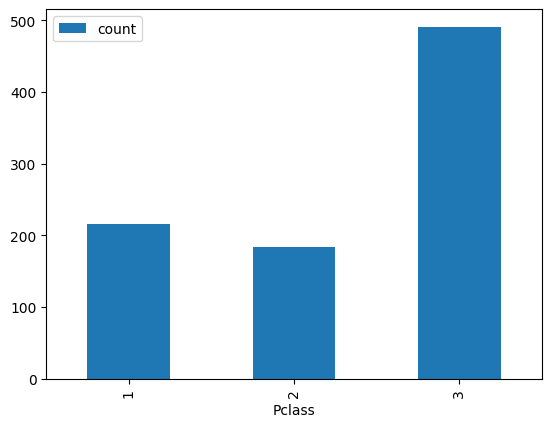

In [7]:
pclass_df.plot(kind="bar")

Let's now have a look at **survivors**.

❓ Plot a barchart showing the *survival rate* of each passenger class. `0` means no one survived in the class, `1` means everyone survived.

<Axes: xlabel='Pclass'>

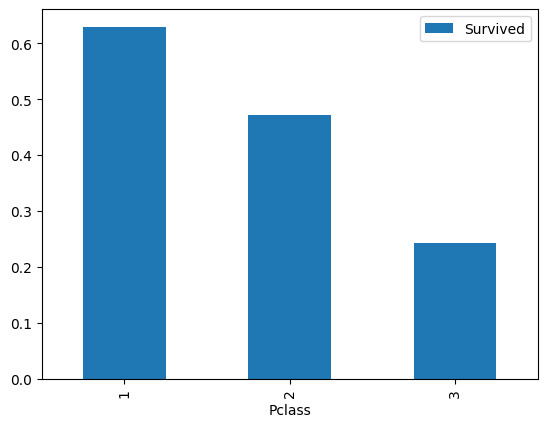

In [8]:
titanic_df[["Pclass","Survived"]].groupby('Pclass').mean().plot(kind='bar')

### Gender Analysis

Let's have a look at the `Sex` column.

❓ Use the [`pandas.Series.unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html) function to check the different values used in that column

In [9]:
titanic_df['Sex'].unique()

array(['male', 'female'], dtype=object)

❓ Plot a barchart showing the *survival rate* of each gender. Based on the data, which gender had the more favourable outcome?

<Axes: xlabel='Sex'>

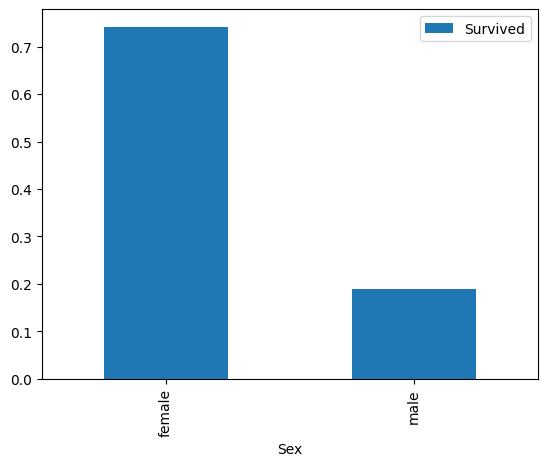

In [10]:
titanic_df[['Survived', 'Sex']].groupby('Sex').mean().plot(kind='bar')

Let's build a fancier histogram where we show the total number of passengers + the total number of survivors for each gender.

❓ Build a `survivors_df` DataFrame with two columns: `Total` and `Survived`, and two rows (`male` and `female`). Plot it.

<Axes: xlabel='Sex'>

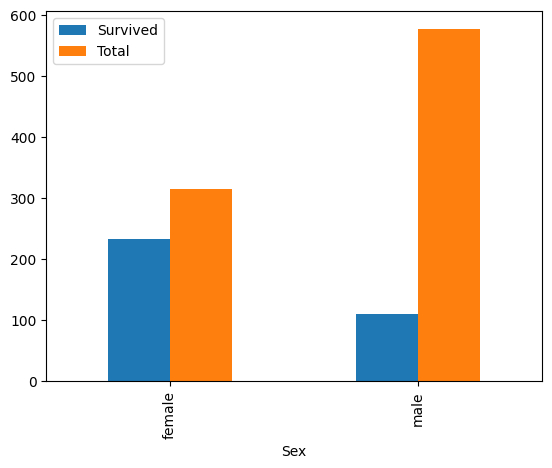

In [11]:
survivors_df = titanic_df[['Survived', 'Sex']].groupby('Sex').sum()
survivors_df['Total'] = titanic_df[['Survived', 'Sex']].groupby('Sex').count()
survivors_df.plot(kind='bar')

## Children

The former analysis did not take into account ages. We want to differentiate between a child and an adult and see how *survival rates* are affected.

❓ Use boolean indexing to create a `children_df` containing only rows of child passengers

In [12]:
children_df = titanic_df[titanic_df['Age'] <= 17]
children_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q


❓ How many children were there in the Titanic?

In [13]:
children_df.shape[0]

113

❓ How many children survived?

In [14]:
children_df['Survived'].sum()

61

❓ Plot a barchart of survivors / total for each category: `male`, `female`, `children`. Bear in mind that you need to **substract** the boys from the `male` statistics, and the girls from the `female` statistics.

In [18]:
# Add a new row to survivors_df with index 'children':
# - First value: total number of children who survived (sum of 'Survived' column in children_df)
# - Second value: total number of children (number of rows in children_df)
survivors_df.loc['children'] = [children_df['Survived'].sum(), children_df.shape[0]]

# Display the updated survivors_df DataFrame
survivors_df

,Survived,Total
Sex,,
female,233,314
male,109,577
children,61,113


In [16]:
# Group the children_df by 'Sex', and sum the number of survivors per gender
children_gender_df = children_df[['Survived', 'Sex']].groupby('Sex').sum()

# Add a new column 'Total' that counts the total number of children per gender
children_gender_df['Total'] = children_df[['Survived', 'Sex']].groupby('Sex').count()

# Add a row labeled 'children' with 0 survivors and 0 total (can be used for cumulative stats later)
children_gender_df.loc['children'] = [0, 0]

# Display the updated DataFrame
children_gender_df


,Survived,Total
Sex,,
female,38,55
male,23,58
children,0,0


<Axes: xlabel='Sex'>

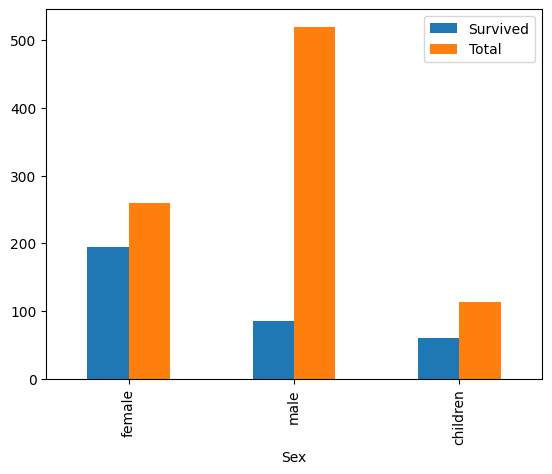

In [19]:
(survivors_df - children_gender_df).plot(kind='bar')

## [Optional] Big families

❓ Find out if it was harder for bigger families to survive?
  
Here you create a new column in your `DataFrame` for the family size of the passenger.

In [ ]:
# Create a new column 'family_size' by summing number of siblings/spouses (SibSp) and parents/children (Parch) onboard
titanic_df['family_size'] = titanic_df['SibSp'] + titanic_df['Parch']

# Group the data by family size and calculate the mean survival rate for each group,
# then plot the survival rate as a bar chart
titanic_df.groupby('family_size')['Survived'].mean().plot(kind='bar');


## [Optional] Distinguished titles

❓ Were passengers with distinguished titles given preferrence during the evacuation?
   
With some string manipulations, create a new column for each user with their title

In [ ]:
# Extract the title from each passenger's name (e.g., Mr, Miss, Dr) by:
# - Splitting on ',' to isolate the title part (second element)
# - Splitting on '.' to isolate the title word
# - Stripping any whitespace
titanic_df['Title'] = titanic_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Group by extracted 'Title', count the number of passengers per title using 'PassengerId',
# sort the counts in ascending order, and plot them as a bar chart with a logarithmic y-axis
titanic_df.groupby('Title').count()['PassengerId'].sort_values().


In [ ]:
titanic_df.groupby('Title')['Survived'].mean().sort_values().plot(kind='bar')